In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
GT = pd.read_csv('GT_Img10080.csv')
GT

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,ball,760,363,8,9,left010080.png,1280,720,764.0,367.5
1,ball,763,365,9,10,left010081.png,1280,720,767.5,370.0
2,ball,766,369,8,9,left010082.png,1280,720,770.0,373.5
3,ball,770,371,8,10,left010083.png,1280,720,774.0,376.0
4,ball,773,374,8,10,left010084.png,1280,720,777.0,379.0
...,...,...,...,...,...,...,...,...,...,...
96,ball,652,326,9,10,left010176.png,1280,720,656.5,331.0
97,ball,645,335,9,8,left010177.png,1280,720,649.5,339.0
98,ball,638,344,10,9,left010178.png,1280,720,643.0,348.5
99,ball,632,354,9,9,left010179.png,1280,720,636.5,358.5


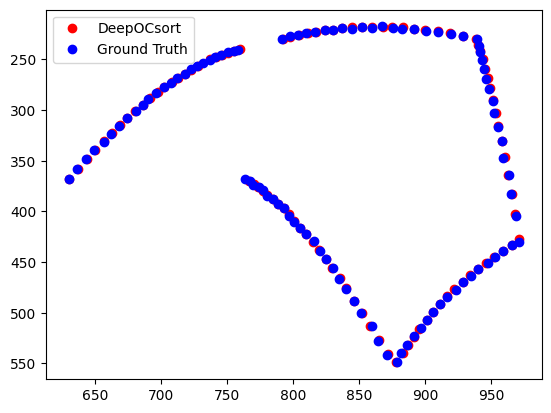

In [12]:
df = pd.read_csv('img10080_deepocsort.csv')
df['center_x'] = df['x'] + df['width']/2
df['center_y'] = df['y'] + df['height']/2

#plot the center of the bounding box
from matplotlib import markers
plt.plot(df['center_x'], df['center_y'], 'o', color='red', label='DeepOCsort')
plt.plot(GT['center_x'], GT['center_y'], 'o', color='blue', label='Ground Truth')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.legend()
plt.show()

In [14]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

In [15]:
#AMD function definition
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)

In [16]:
x1 = GT['center_x']
y1 = GT['center_y']
x2 = df['center_x']
y2 = df['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates1 = list(zip(x2,y2))
    ground_coordinates1 = list(zip(x1,y1))
    count += 1
    
error1 =avg_displacement_error(predicted_coordinates1, ground_coordinates1)
error2 =avg_mahalanobis_distance(predicted_coordinates1, ground_coordinates1)
print('ADE for DeepOCSORT (img10080) is:', error1, 'and AMD for DeepOCSORT (img10080) is:', error2)

ADE for DeepOCSORT (img10080) is: 10.78666994734024 and AMD for DeepOCSORT (img10080) is: 0.15714088766822376


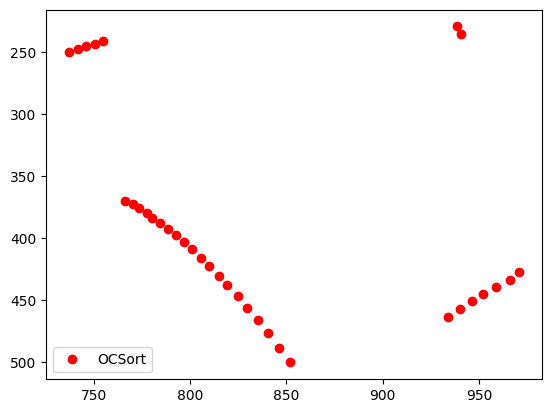

In [21]:
#img10080 - ocsort
df2 = pd.read_csv('img10080_ocsort.csv')
df2['center_x'] = df2['x'] + df2['width']/2 
df2['center_y'] = df2['y'] + df2['height']/2

#   plot the center of the bounding box
from matplotlib import markers
plt.plot(df2['center_x'], df2['center_y'], 'o', color='red', label='OCSort')
# plt.plot(GT['center_x'], GT['center_y'], 'o', color='blue', label='Ground Truth')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.legend()
plt.show()

In [22]:
x3 = df2['center_x']
y3 = df2['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x3,y3))
    ground_coordinates2 = list(zip(x1,y1))
    count += 1
    
error3 =avg_displacement_error(predicted_coordinates2, ground_coordinates2)
error4 =avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates2)
print('ADE for OCSORT (img10080) is:', error3, 'and AMD for OCSORT (img10080) is:', error4)

ADE for OCSORT (img10080) is: 89.87807395440119 and AMD for OCSORT (img10080) is: 1.4465754182344026


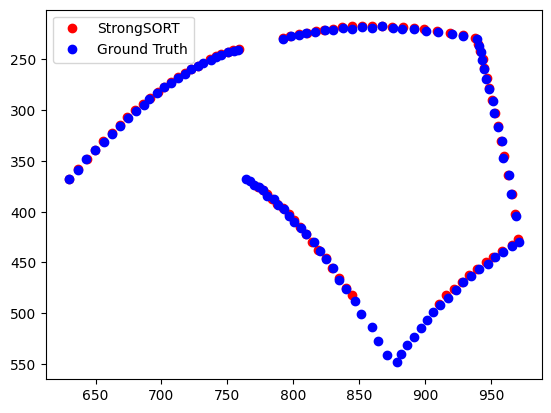

In [23]:
#img10080 - StrongSORT
df3 = pd.read_csv('img10080_strongsort.csv')
df3['center_x'] = df3['x'] + df3['width']/2
df3['center_y'] = df3['y'] + df3['height']/2

#   plot the center of the bounding box
from matplotlib import markers
plt.plot(df3['center_x'], df3['center_y'], 'o', color='red', label='StrongSORT')
plt.plot(GT['center_x'], GT['center_y'], 'o', color='blue', label='Ground Truth')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.legend()
plt.show()

In [25]:
x4 = df3['center_x']
y4 = df3['center_y']
x5 = GT['center_x']
y5 = GT['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates4 = list(zip(x4,y4))
    ground_coordinates4 = list(zip(x5,y5))
    count += 1
error5 =avg_displacement_error(predicted_coordinates4, ground_coordinates4)
error6 =avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates4)
print('ADE for StrongSORT (img10080) is:', error5, 'and AMD for StrongSORT (img10080) is:', error6)

ADE for StrongSORT (img10080) is: 104.34757579672882 and AMD for StrongSORT (img10080) is: 1.5642308632147568
